In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

In [8]:
#ROOT_DIR = os.path.abspath('./train')
ROOT_DIR = os.path.abspath(r"../datasets\rgbd_joined_dataset\ruka_2")
print(ROOT_DIR)
image_directory = os.path.join(ROOT_DIR, "color/")
annotation_file = os.path.join(ROOT_DIR, "instances_hands_train2022.json")


c:\Users\Stefan\source\repos\HGR_CNN\datasets\rgbd_joined_dataset\ruka_2


In [9]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [10]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
hand

Custom COCO supercategories: 
arm-regions


In [11]:
category_ids = example_coco.getCatIds(catNms=['hand'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [12]:
image_data

{'id': 16868,
 'file_name': '0003506_gest1_X-116.3_Y-89.2_Z526.5_hand3_date27-02-2022_20#05#54.png',
 'width': 320,
 'height': 256,
 'date_captured': '2022-03-07 11:00:57.662284',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

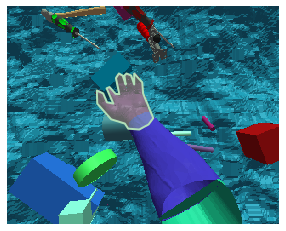

In [13]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (16.0, 20.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)